# import ncessary libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Data Preprocessing 

In [15]:
df=pd.read_csv("Mastercard_stock_history.csv",index_col="Date")

In [16]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [17]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [18]:
# drop Dividends and stock splits columns 
df.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [19]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000


In [23]:
df.shape

(3872, 5)

In [20]:
# summerize data
df.describe()

,Open,High,Low,Close,Volume
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08


The minimum stock price is $4.10, and the highest is $400.5. The mean is at $105.9 and the standard deviation $107.3,
which means that stocks have high variance in High Column

In [22]:
#determine the missing values in the dataset
print(df.isna().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


It seems that the dataset has no missing values.

In [28]:
df.index.sort_values()

Index(['2006-05-25', '2006-05-26', '2006-05-30', '2006-05-31', '2006-06-01',
       '2006-06-02', '2006-06-05', '2006-06-06', '2006-06-07', '2006-06-08',
       ...
       '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04',
       '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11'],
      dtype='object', name='Date', length=3872)

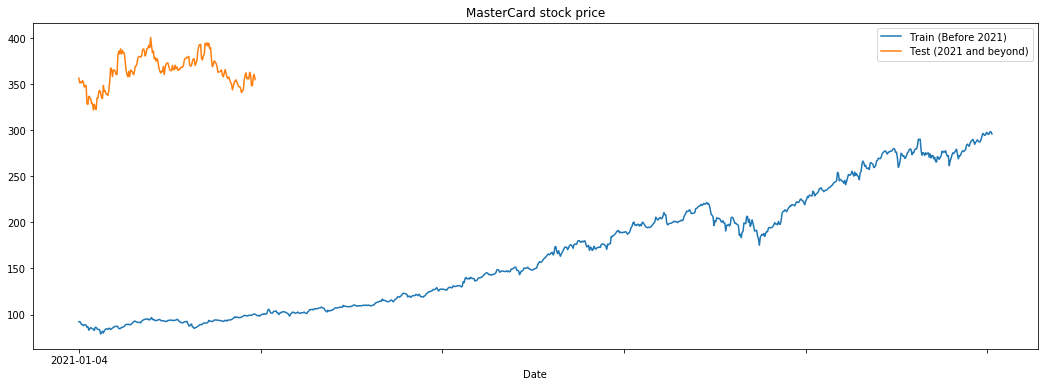

In [37]:
tstart= 2016
tend=2020
def train_test_plot(df , tstart, tend):
    
        df.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(18, 6), legend=True)
        df.loc[f"{tend+1}":, "High"].plot(figsize=(18, 6), legend=True)
        plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
        plt.title("MasterCard stock price")
        plt.show()

train_test_plot(df,tstart,tend)
    

In [38]:
def train_test_split(df, tstart, tend):
    train = df.loc[f"{tstart}":f"{tend}", "High"].values
    test = df.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(df, tstart, tend)

In [39]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

# Using LSTM for modeling

In [69]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [70]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [71]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [72]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 125)               63500     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 126       
Total params: 63,626
Trainable params: 63,626
Non-trainable params: 0
_________________________________________________________________


# train LSTM model 

In [73]:
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
946/946 [==============================] - 5s 5ms/sample - loss: 0.0152
Epoch 2/10
946/946 [==============================] - 4s 4ms/sample - loss: 0.0027
Epoch 3/10
946/946 [==============================] - 4s 4ms/sample - loss: 0.0025
Epoch 4/10
946/946 [==============================] - 5s 5ms/sample - loss: 0.0017
Epoch 5/10
946/946 [==============================] - 4s 4ms/sample - loss: 0.0015
Epoch 6/10
946/946 [==============================] - 5s 5ms/sample - loss: 0.0012
Epoch 7/10
946/946 [==============================] - 4s 5ms/sample - loss: 0.0012
Epoch 8/10
946/946 [==============================] - 4s 5ms/sample - loss: 7.9247e-04
Epoch 9/10
946/946 [==============================] - 4s 5ms/sample - loss: 9.3981e-04
Epoch 10/10
946/946 [==============================] - 5s 5ms/sample - loss: 0.0011


In [ ]:
dataset_total = df.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

In [ ]:
plot_predictions(test_set,predicted_stock_price)

In [ ]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

In [ ]:
return_rmse(test_set,predicted_stock_price)


# Using GRU model

In [77]:
model_gru=Sequential()

model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the gru
model_gru.compile(optimizer="RMSprop", loss="mse")
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 125)               47625     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 126       
Total params: 47,751
Trainable params: 47,751
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_gru.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
946/946 [==============================] - 4s 4ms/sample - loss: 0.0228 2s -
Epoch 2/20
946/946 [==============================] - 3s 4ms/sample - loss: 0.0022
Epoch 3/20
946/946 [==============================] - 3s 4ms/sample - loss: 0.0010
Epoch 4/20
946/946 [==============================] - 3s 3ms/sample - loss: 0.0011
Epoch 5/20
946/946 [==============================] - 3s 3ms/sample - loss: 9.7402e-04
Epoch 6/20
946/946 [==============================] - 3s 4ms/sample - loss: 7.8234e-04
Epoch 7/20
946/946 [==============================] - 3s 3ms/sample - loss: 7.1086e-04
Epoch 8/20
946/946 [==============================] - 3s 3ms/sample - loss: 6.0015e-04
Epoch 9/20
946/946 [==============================] - 3s 4ms/sample - loss: 5.9317e-04
Epoch 10/20
946/946 [==============================] - 3s 3ms/sample - loss: 5.3515e-04
Epoch 11/20
946/946 [==============================] - 3s 4ms/sample - loss: 5.7891e-04
Epoch 12/20
946/946 [==============================]

In [82]:
scores=model_gru.evaluate(X_test,y_test)
print ("Accuracy : %.2f%%" % (scores[1]*100))

195/195 [==============================] - 0s 984us/sample - loss: 0.0058


IndexError: invalid index to scalar variable.

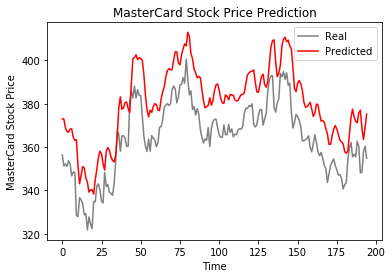

In [83]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

In [84]:
return_rmse(test_set,GRU_predicted_stock_price)


The root mean squared error is 16.78.
